In [2]:
import sys
sys.path.append('..')
from pathlib import Path
from utils import *
import train_config as config
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 3
try:
    plt.rcParams["text.usetex"] = True
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = 12
    plt.style.use('ggplot')
except:
    pass

In [3]:
classid_to_classname = {v: k for k, v in classname_to_classid.items()}

In [4]:
def rgb2hex(rgb): return '#%02x%02x%02x' % rgb

In [5]:
dataset_name = "../fsoco_segmentation_processed"
img_mask_pairs = find_mask_img_pairs(dataset_name, "imgs", "masks")
img_mask_pairs[:5]

[(PosixPath('../fsoco_segmentation_processed/imgs/BME_00006.npz'),
  PosixPath('../fsoco_segmentation_processed/masks/BME_00006.npz')),
 (PosixPath('../fsoco_segmentation_processed/imgs/BME_00019.npz'),
  PosixPath('../fsoco_segmentation_processed/masks/BME_00019.npz')),
 (PosixPath('../fsoco_segmentation_processed/imgs/BME_00028.npz'),
  PosixPath('../fsoco_segmentation_processed/masks/BME_00028.npz')),
 (PosixPath('../fsoco_segmentation_processed/imgs/BME_00039.npz'),
  PosixPath('../fsoco_segmentation_processed/masks/BME_00039.npz')),
 (PosixPath('../fsoco_segmentation_processed/imgs/BME_00043.npz'),
  PosixPath('../fsoco_segmentation_processed/masks/BME_00043.npz'))]

In [6]:
ds = ConeSegmentationDataset(img_mask_pairs, transform=None)
it = iter(ds)

In [7]:
# Class distributions (absolute terms)
class_counts = np.zeros((len(ds), N_CLASSES))
for i, (img, mask) in tqdm.tqdm(enumerate(ds)):
    mask = mask.numpy()
    class_counts[i] += mask.sum(axis=(1, 2))

95it [00:03, 28.70it/s]


KeyboardInterrupt: 

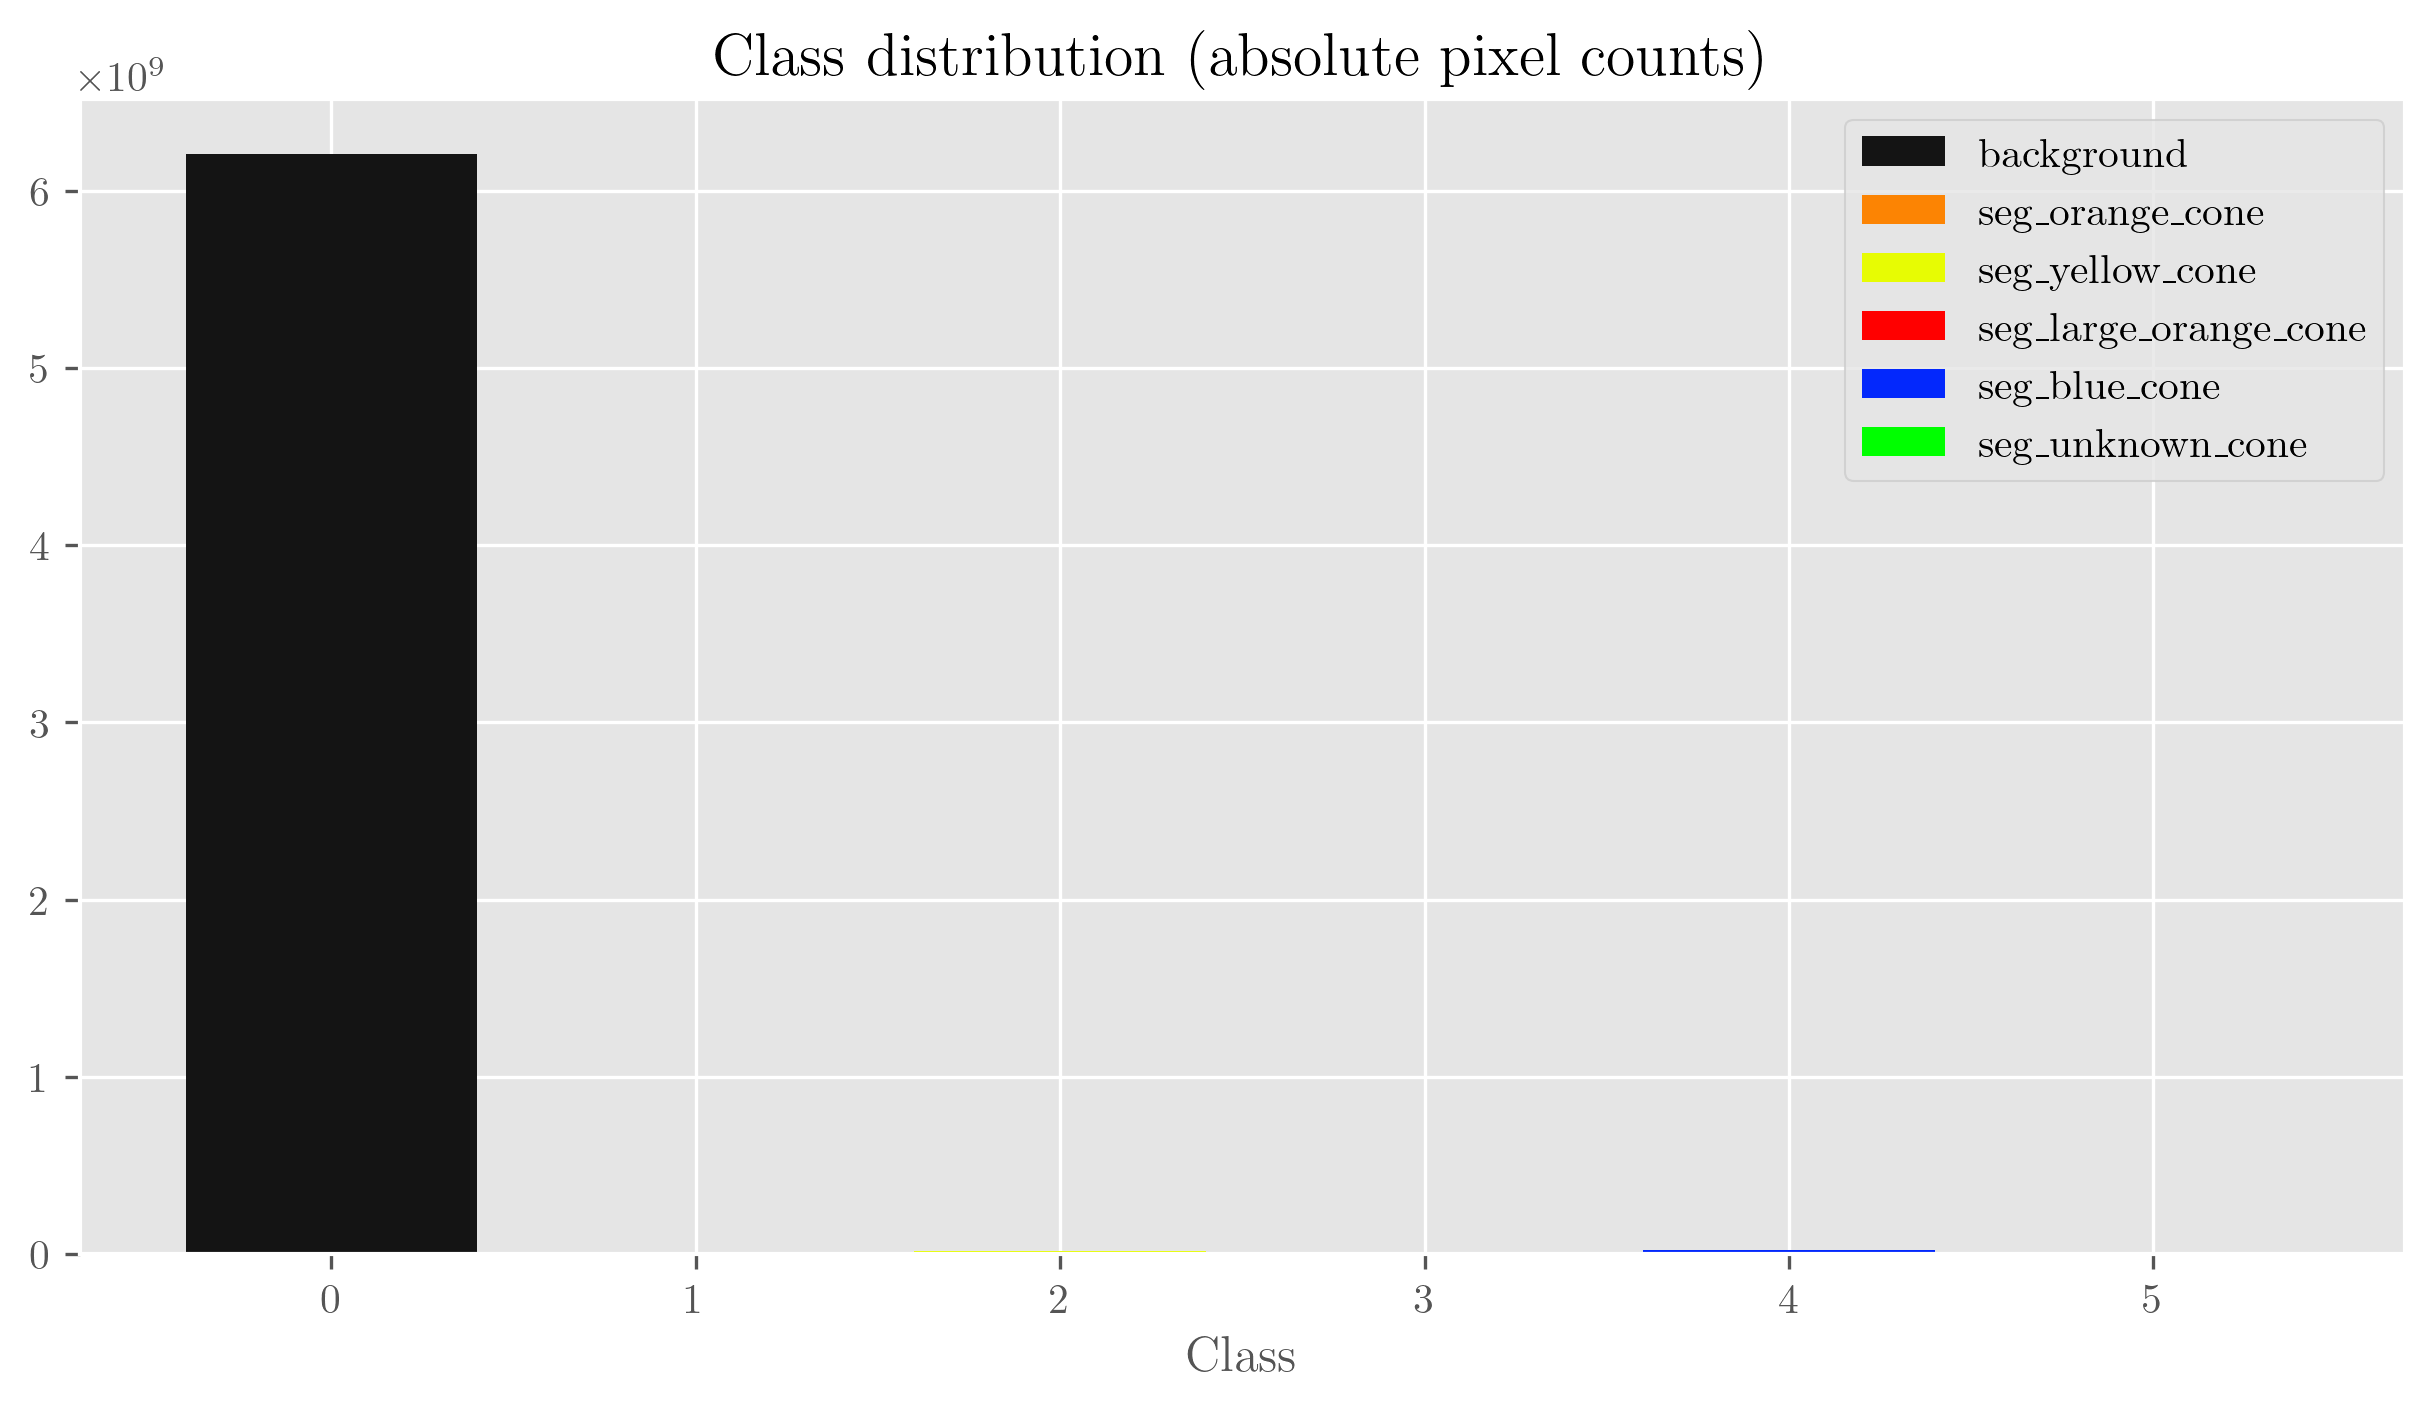

In [25]:
plt.figure(figsize=(10, 5), dpi=300)
plt.title("Class distribution (absolute pixel counts)")
for i in range(N_CLASSES):
    plt.bar(i, class_counts[:, i].sum(), label=classid_to_classname[i], color=rgb2hex(classid_to_color[i]))
plt.xticks(np.arange(N_CLASSES))
plt.xlabel("Class")
plt.legend()

In [8]:
# Class distributions (relative in the image)
class_image_percentages = np.zeros((len(ds), N_CLASSES))
for i, (img, mask) in tqdm.tqdm(enumerate(ds)):
    mask = mask.numpy()
    mask_sum = mask.sum(axis=(1, 2))
    mask_sum /= (mask.shape[1] * mask.shape[2])
    class_image_percentages[i] = mask_sum

0it [00:00, ?it/s]

889it [00:22, 39.18it/s]


KeyboardInterrupt: 

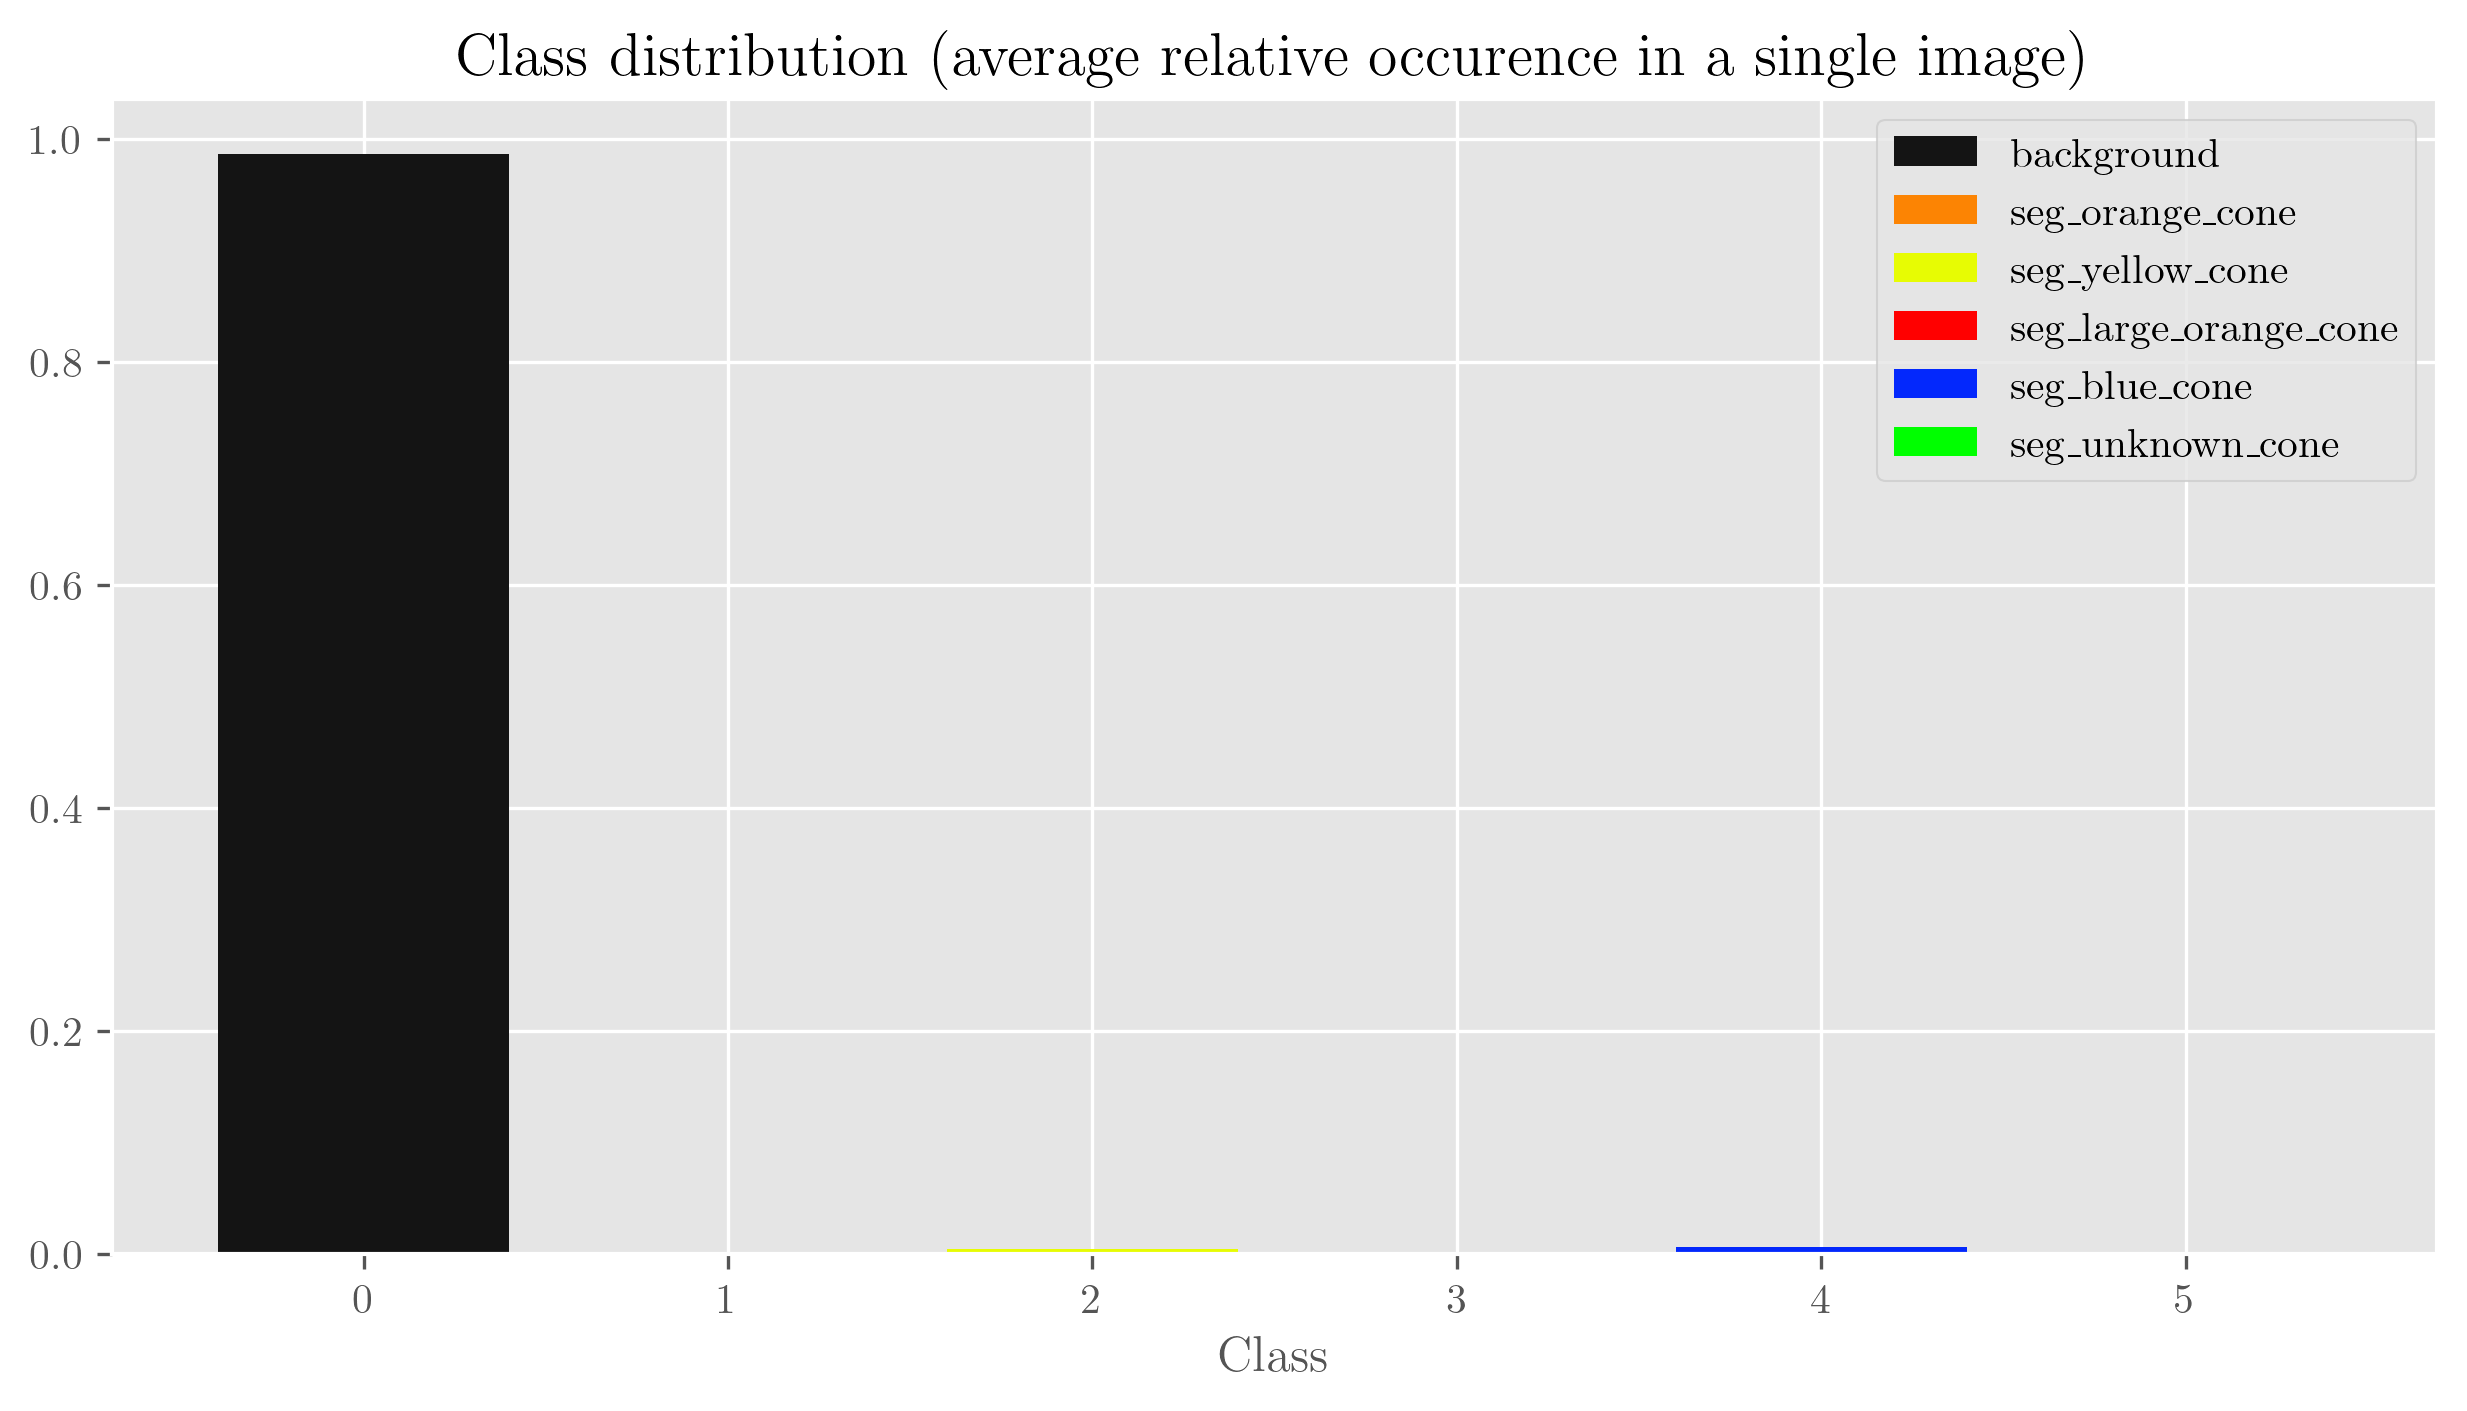

In [28]:
plt.figure(figsize=(10, 5), dpi=300)
plt.title("Class distribution (average relative occurence in a single image)")
for i in range(N_CLASSES):
    plt.bar(i, class_image_percentages[:, i].mean(), label=classid_to_classname[i], color=rgb2hex(classid_to_color[i]))
plt.xticks(np.arange(N_CLASSES))
plt.xlabel("Class")
plt.legend()

In [9]:
#  Distributions of pixel values
R_hist = np.zeros(256)
G_hist = np.zeros(256)
B_hist = np.zeros(256)
for i, (img, mask) in tqdm.tqdm(enumerate(ds)):
    img = img.numpy()
    R_hist += np.histogram(img[0], bins=256, range=(0, 255))[0]
    G_hist += np.histogram(img[1], bins=256, range=(0, 255))[0]
    B_hist += np.histogram(img[2], bins=256, range=(0, 255))[0]

0it [00:00, ?it/s]

1516it [03:47,  6.68it/s]


In [10]:
R_mean = np.average(np.arange(256), weights=R_hist)
G_mean = np.average(np.arange(256), weights=G_hist)
B_mean = np.average(np.arange(256), weights=B_hist)
R_std = np.sqrt(np.average((np.arange(256) - R_mean)**2, weights=R_hist))
G_std = np.sqrt(np.average((np.arange(256) - G_mean)**2, weights=G_hist))
B_std = np.sqrt(np.average((np.arange(256) - B_mean)**2, weights=B_hist))

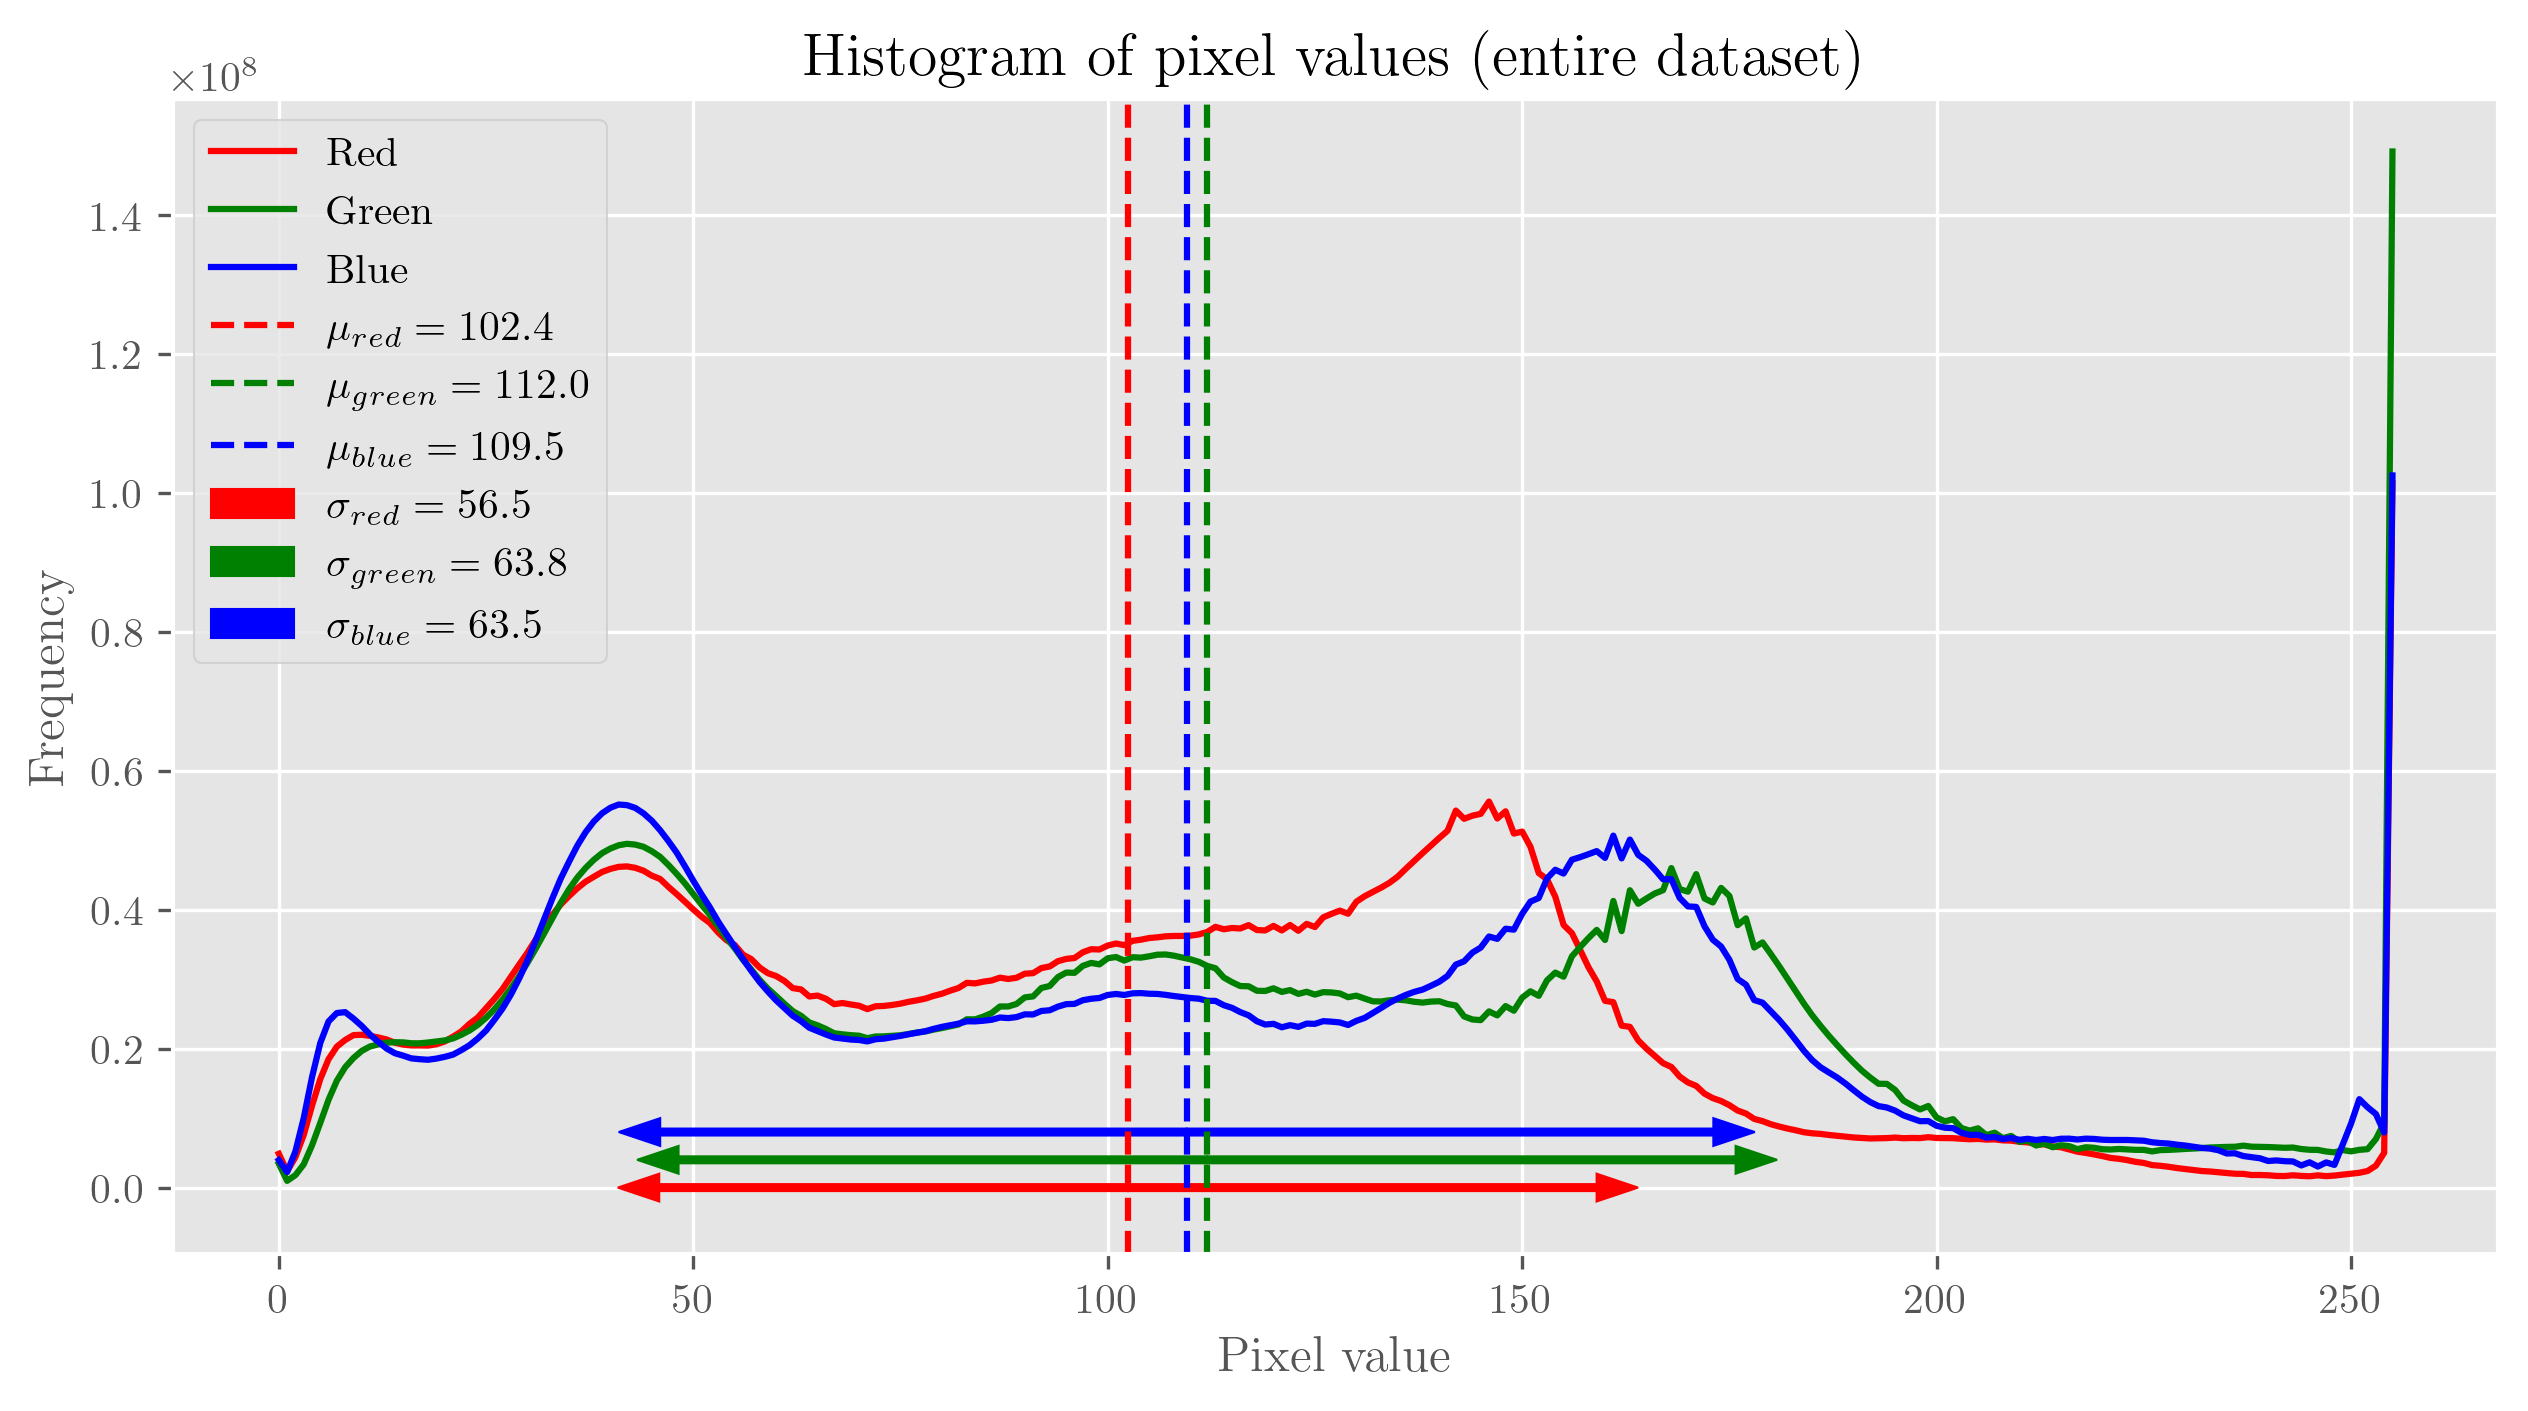

In [12]:
x = np.arange(256)
# Plot histograms
plt.figure(figsize=(10, 5), dpi=300)
plt.title("Histogram of pixel values (entire dataset)")
plt.plot(R_hist, label="Red", color="red")
plt.plot(G_hist, label="Green", color="green")
plt.plot(B_hist, label="Blue", color="blue")
# Means
plt.axvline(x=R_mean, color="red", linestyle="--", label=f"$\mu_{{red}} = {R_mean:.1f}$")
plt.axvline(x=G_mean, color="green", linestyle="--", label=f"$\mu_{{green}} = {G_mean:.1f}$")
plt.axvline(x=B_mean, color="blue", linestyle="--", label=f"$\mu_{{blue}} = {B_mean:.1f}$")
# Standard deviations
y = 0.0e8
plt.arrow(R_mean, y, R_std, 0, color="red", label=f"$\sigma_{{red}} = {R_std:.1f} $", head_width=4e6, head_length=5, width=1e6)
plt.arrow(R_mean, y, -R_std, 0, color="red", head_width=4e6, head_length=5, width=1e6)
y = 0.04e8
plt.arrow(G_mean, y, G_std, 0, color="green", label=f"$\sigma_{{green}} = {G_std:.1f}$", head_width=4e6, head_length=5, width=1e6)
plt.arrow(G_mean, y, -G_std, 0, color="green", head_width=4e6, head_length=5, width=1e6)
y = 0.08e8
plt.arrow(B_mean, y, B_std, 0, color="blue", label=f"$\sigma_{{blue}} = {B_std:.1f}$", head_width=4e6, head_length=5, width=1e6)
plt.arrow(B_mean, y, -B_std, 0, color="blue", head_width=4e6, head_length=5, width=1e6)
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.legend()